# **INSPECCIÓN PRINCIPAL DE LA BASE DE DATOS**
Cybersecurity Intrusion Detection Dataset, es una base de datos que recopila información relacionada principalmente a los patrones de comportamiento del usuario y el tráfico de red, tal como lo describe el autor. El Dataset cuenta con 11 columnas con 9537 registros (filas), distribuidos de la siguiente manera:

### **Variables categóricas:**
1.	**Encryption_used:**
Indica el tipo de encriptación aplicado en la conexión. Sus categorías son:
-	AES: Estándar de cifrado avanzado, fuerte y ampliamente utilizado.
-	DES: Estándar antiguo de cifrado de datos.
-	Ninguna encriptación: No se usó ningún método de encriptación.
2.	**Protocol_type:**
Representa el protocolo utilizado en la comunicación:
-   TCP (Protocolo de Control de Transmisión).
-   UDP (Protocolo de Datagramas del Usuario).
-   ICMP (Protocolo de Mensajes de Control de Internet, usado en diagnósticos).
3. **Browser_type:** Tipo de navegador utilizado por el usuario.
4.	**Unusual_time_access:** Con registro binario que indica si inicio sesión fuera del horario normal.
5. **Attack_detected:** Variable con clasificación binaria que determina si recibió un ataque o no.
### **Variables númericas:**
-	**Asociadas al tráfico de red:**
 6.	**Network_packet_size:** Tamaño de paquetes de bytes que oscila entre 64 y 1500 bytes.
-	**Asociadas al comportamiento del usuario:**
 7.	**Login_attempts:** Intentos de inicio de sesión típicos de los usuarios
 8.	**Session_duration:** Tiempo de sesión iniciada.
 9.	**Failed_logins:** Número de inicios de sesión fallidos.
 10.	**Ip_reputation_score:** Mide y clasifica la confiabilidad de la dirección IP.
### **Otras**
11. **Session_id:** Número de ID de la sesión del usuario.
### **Nuevas variables**
12. **Minutos_sesion:** Cantidad de minutos de sesión iniciada relacionado con **Sesion_duration**.
13. **accesos_fallidos:** Mapeo especial creado a partir del **login_attempts**.
14. **paquetes_bytes:** Mapeo especial creado a partir del **network_packet_size**.


## **Vista previa del dataset**

In [8]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr
import kagglehub
url = "https://raw.githubusercontent.com/jdrodriguez03/proyecto-final-progra-2/main/data/cybersecurity_intrusion_data.csv"
df = pd.read_csv(url)
df = pd.read_csv(url, encoding="utf-8")
print(df.head())

  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                1  
1      Firefox                    0 

### **Información Géneral**
- Número de filas, columnas con su nombre.
- Clasificación de tipo de datos: Object, float, int, etc.
- Valores no nulos.
- Cantidad de registros por columna.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


### **Inspección y tratamiento de datos faltantes**
Se ejecuta el código para poder visualizar los datos faltantes:
1. Tabla pequeña del total de valores faltantes normal y porcentual.
2. Mapa de valores faltantes, facilíta la visualización.
3. Imputación de los datos faltantes.
4. Nuevo mapa.

In [10]:
"""
Tabla normal de valores faltantes
"""
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [11]:
"""
Tabla de con porcentajes de valores faltantes
"""
(df.isnull().sum() / len(df)) * 100

session_id              0.000000
network_packet_size     0.000000
protocol_type           0.000000
login_attempts          0.000000
session_duration        0.000000
encryption_used        20.614449
ip_reputation_score     0.000000
failed_logins           0.000000
browser_type            0.000000
unusual_time_access     0.000000
attack_detected         0.000000
dtype: float64

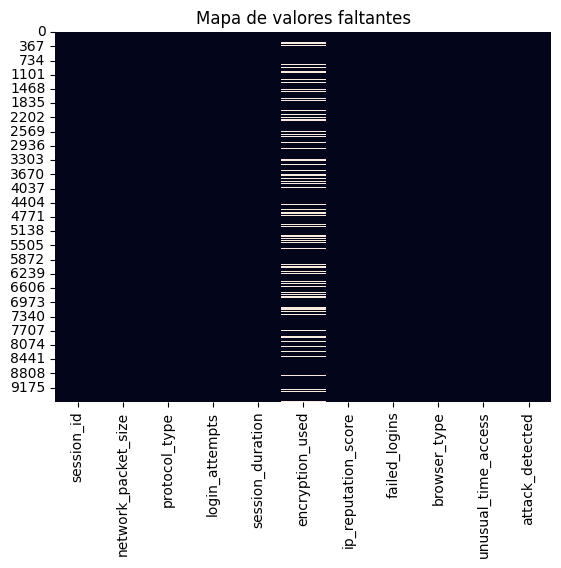

In [12]:
"""
 Mapa de valores faltantes
"""
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

**Análisis**

De acuerdo con el mapa, hay 1.966 valores faltantes en encryption_used. Sin embargo, según la información proporcionada en Kaggle, los datos nulos representan comunicación no cifrada y, durante la imputación, se les asignó el valor "Ninguna_encript".

In [13]:
"""
Imputación
"""
valor="Ninguna_encript"
df['encryption_used']=df['encryption_used'].fillna(valor)

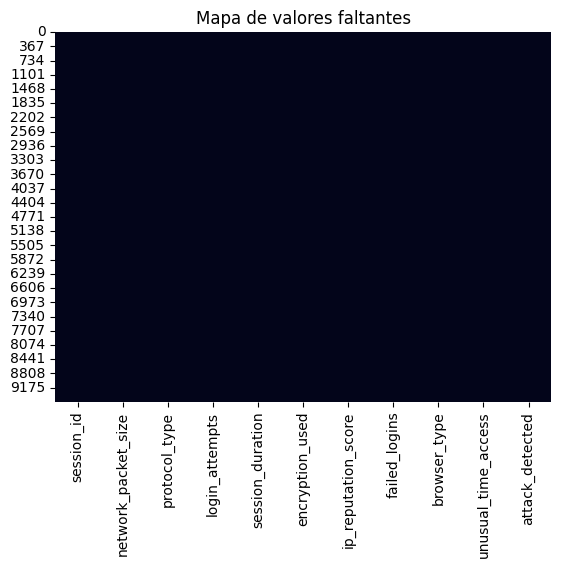

In [14]:
"""
Nueva visualización
"""
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()


### **MAPEO DEL DATASET**
Durante el proceso de limpieza del dataset, se realizó un análisis de las variables categóricas encryption_used, protocol_type y browser_type mediante la función value_counts, con el fin de identificar posibles inconsistencias en los textos y evitar la presencia de categorías repetidas que pudieran alterar el análisis de los datos.

In [15]:
"""
Primer análisis para mapeo
"""
df["encryption_used"].value_counts()

encryption_used
AES                4706
DES                2865
Ninguna_encript    1966
Name: count, dtype: int64

In [16]:
"""
Segundo análisis para mapeo
"""
df["protocol_type"].value_counts()

protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64

In [17]:
"""
Tercer análisis para mapeo
"""
df["browser_type"].value_counts()

browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64

### **Datos Duplicados**
Búsqueda de registros duplicados en el dataset.

In [18]:
df[df.duplicated(keep=False)]

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected


### **Descripción estadística**
Se presenta infromación estadística del dataset por medio de:
1. df.describe()
2. Histogramas de las variables numéricas (Generados con ayuda de IA).

In [19]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


**Análisis**

El df.describe() da una visualización detallada de las medidas de tendencia central y de dispersión de cada una de las variables. Por lo general, los valores de la media y la mediana permiten analizar posibles sesgos en las distribuciones, y en este caso se observa que en la mayoría de las variables ambos valores son cercanos, lo que sugiere una distribución relativamente estable en condiciones normales. Además, los cuartiles revelan que la mayoría de los datos se encuentran dentro de un rango habitual; sin embargo, los valores máximos y mínimos tan elevados muestran la presencia de datos atípicos que pueden afectar la dispersión. Estos valores son relevantes, ya que pueden corresponder a comportamientos inusuales dentro del sistema, influyendo directamente en la variabilidad total del conjunto de datos.

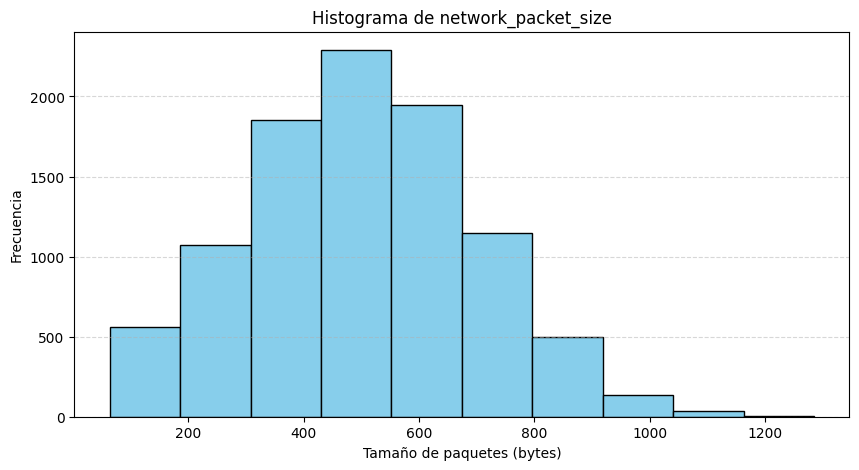

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["network_packet_size"].dropna(), bins=10, color="skyblue",edgecolor="black")
plt.xlabel("Tamaño de paquetes (bytes)")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {"network_packet_size"}")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Análisis primer histograma:**

El histograma de network_packet_size, muestra una distribución con una concentración alta en los valores medios con una cola poco extendida hacia la derecha (sesgo positivo). Esto indica que la mayoría del tráfico de red usa paquetes pequeños estándar de bytes.

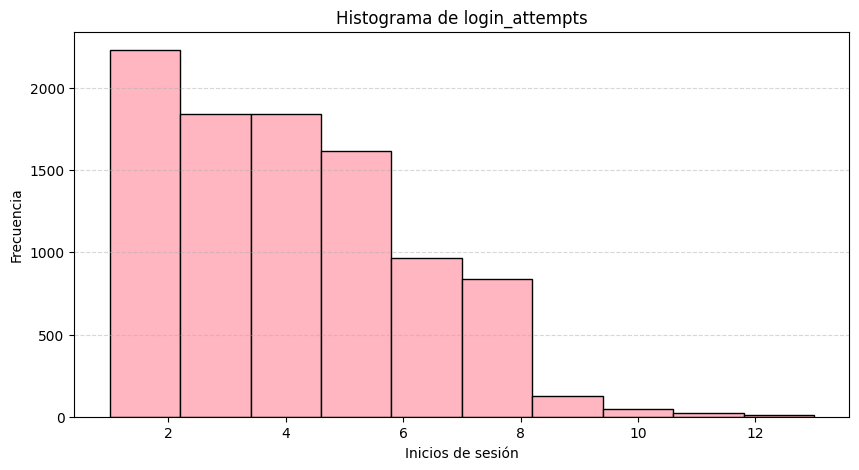

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["login_attempts"].dropna(), bins=10, color="lightpink",edgecolor="black")
plt.xlabel("Inicios de sesión")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {"login_attempts"}")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Análisis segundo histograma:**

El histograma de login_attempts presenta una distribución no normal, la cual revela mayor frecuencia en valores más pequeños y poca frecuencia en valores altos, posiblemente relacionados con intentos de fraude.

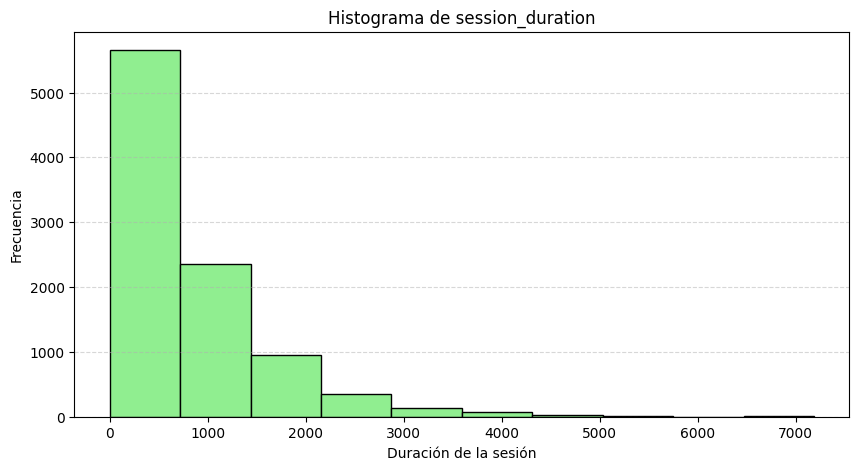

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["session_duration"].dropna(), bins=10, color="lightgreen",edgecolor="black")
plt.xlabel("Duración de la sesión")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {"session_duration"}")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Análisis tercer histograma:**

El histograma de session_duration, muestra un sesgo alto hacia la derecha, donde la mayoría de las sesiones tienen duraciones cortas, sin embargo, presenta una cola larga (posibles datos atípicos o movimientos sospechosos).

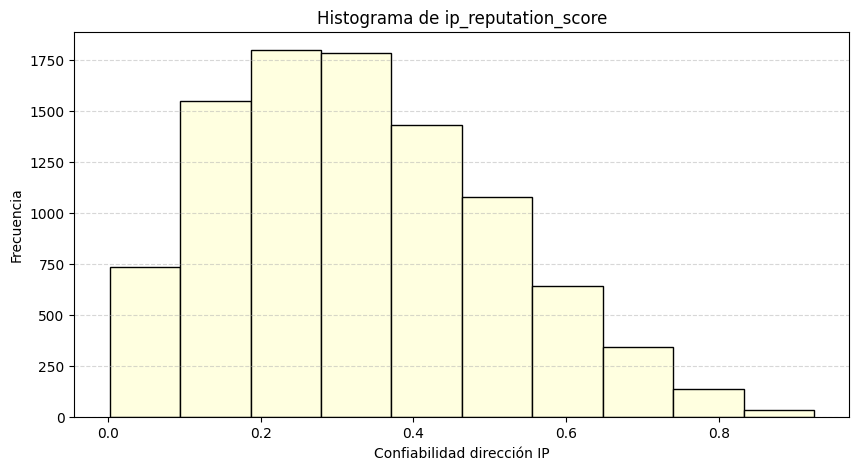

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["ip_reputation_score"].dropna(), bins=10, color="lightyellow",edgecolor="black")
plt.xlabel("Confiabilidad dirección IP")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {"ip_reputation_score"}")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Análisis cuarto histograma:**

El histograma de ip_reputation_score, muestra una fuerte concentración de nivel de confiabilidad en valores bajos, por lo que el riesgo de las IP suele ser mínimo.

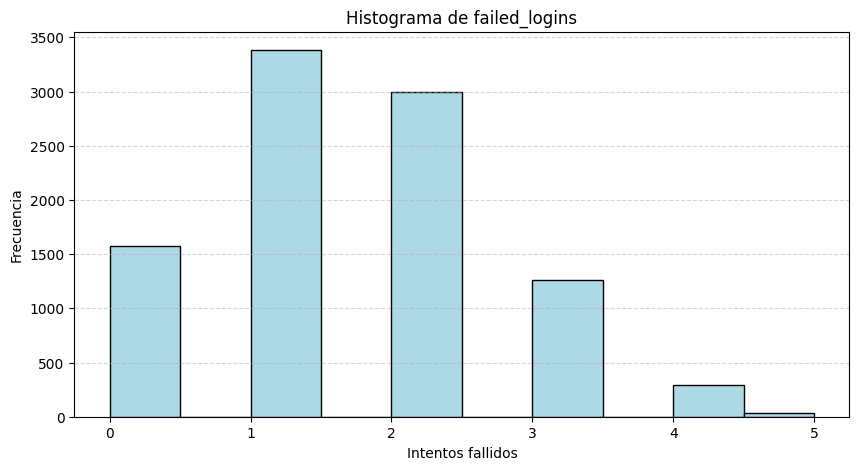

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["failed_logins"].dropna(), bins=10, color="lightblue",edgecolor="black")
plt.xlabel("Intentos fallidos")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de {"failed_logins"}")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Análisis quinto histograma:**

El histograma de failes_logins presenta como la mayoría de los usuarios suele generar pocos intentos fallidos de inicio de sesión entre 0 y 2, no obstante, los intentos más elevados pueden presentar posibles intentos de ataque.

### **Identificacion de outliers**

## Descripción del Proceso Completo de Análisis, Detección de Outliers y Filtración de Datos

A continuación se presenta un desglose estructurado de las tareas realizadas, desde la detección de valores anómalos hasta la depuración y clasificación final del dataset.

---

### 1. Identificación de Outliers en Variables Críticas

Se analizan múltiples variables relevantes para la seguridad informática con el fin de detectar comportamientos anómalos.  
Para cada variable se aplican los siguientes pasos:

#### 1.1 Visualización con Boxplot
Se genera un boxplot que permite observar la distribución de los datos y localizar posibles valores extremos.

#### 1.2 Cálculo de Cuartiles e IQR
- Se obtienen los percentiles 25 (Q1) y 75 (Q3).  
- Con estos valores se calcula el rango intercuartílico (**IQR = Q3 − Q1**).

#### 1.3 Definición de Límites Inferior y Superior
Se establecen los límites matemáticos para determinar outliers:  
- **Límite inferior:** Q1 − 1.5·IQR  
- **Límite superior:** Q3 + 1.5·IQR

#### 1.4 Conteo de Outliers Altos y Bajos
Se contabilizan los registros que se encuentran por fuera de los límites establecidos.

#### 1.5 Interpretación Técnica de Resultados
Para cada variable se analiza el impacto de los outliers detectados y su posible relación con comportamiento anómalo o malicioso.

---

### 2. Análisis del Origen de los Outliers

Los registros identificados como outliers se comparan con la columna que indica si existió un ataque.  
El propósito es determinar:

- Si los valores extremos realmente representan actividad maliciosa.  
- Si corresponden a variaciones normales del sistema (outliers legítimos).  

Este análisis permite detectar **falsos positivos**, es decir, valores atípicos que no están asociados a ciberataques.

---

### 3. Eliminación Selectiva de Outliers No Relevantes

Se eliminan del dataset aquellos outliers que no muestran relación con actividad maliciosa.  
Este proceso garantiza que:

- El análisis posterior no sea afectado por datos irrelevantes.  
- La información restante represente más fielmente el comportamiento real del sistema.  

Finalmente, se verifica que los valores extremos no deseados hayan sido correctamente removidos, dejando un dataset limpio y confiable.


---

### 1 - Network_packet_size

Información: network_packet_size 
 Q1: 365.0, Q3: 635.0, limite inferior: -40.0, limite superior: 1040.0 
 High Outliers: 37, Low Outliers:0


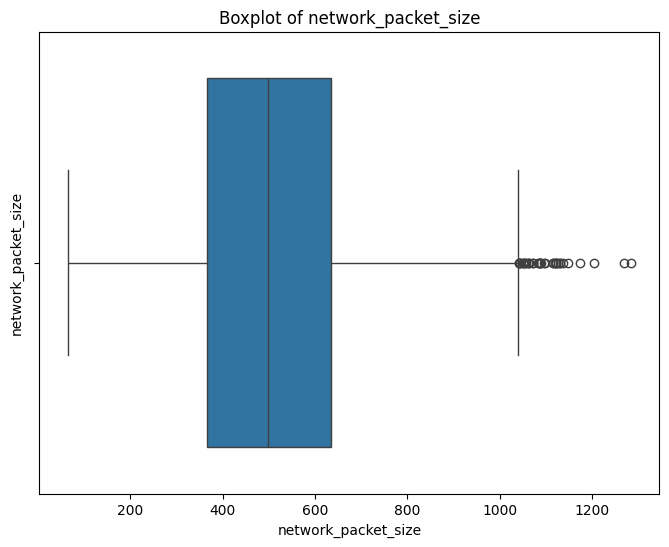

In [26]:
#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['network_packet_size'])
plt.title('Boxplot of network_packet_size')
plt.ylabel('network_packet_size')

#Cuartiles
Q1__network_packet_size = df["network_packet_size"].quantile(0.25)
Q3__network_packet_size = df["network_packet_size"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["network_packet_size"])
lim_inf__network_packet_size = Q1__network_packet_size - 1.5*rango_IQR
lim_sup__network_packet_size =Q3__network_packet_size + 1.5*rango_IQR
cant_lim_inf__network_packet_size =  df[df['network_packet_size'] > lim_sup__network_packet_size].shape[0]
cant_lim_sup__network_packet_size = df[df['network_packet_size'] < lim_inf__network_packet_size].shape[0]

print(f"Información: network_packet_size \n Q1: {Q1__network_packet_size}, Q3: {Q3__network_packet_size}, limite inferior: {lim_inf__network_packet_size}, limite superior: {lim_sup__network_packet_size} \n High Outliers: {cant_lim_inf__network_packet_size}, Low Outliers:{cant_lim_sup__network_packet_size}")


#### Interpretación
Valores extremadamente grandes en paquetes ( > 635.0) de red pueden indicar:
1. Transferencias inusuales.
2. Posibles ataques de denegación de servaicio.
3. Actividades masivas de subida/bajada de datos.

### 2. login_attempts

Informacion: login_attempts 
 Q1: 3.0, Q3: 5.0, limite inferior: 0.0, limite superior: 8.0 
 High Outliers: 206, Low Outliers:0


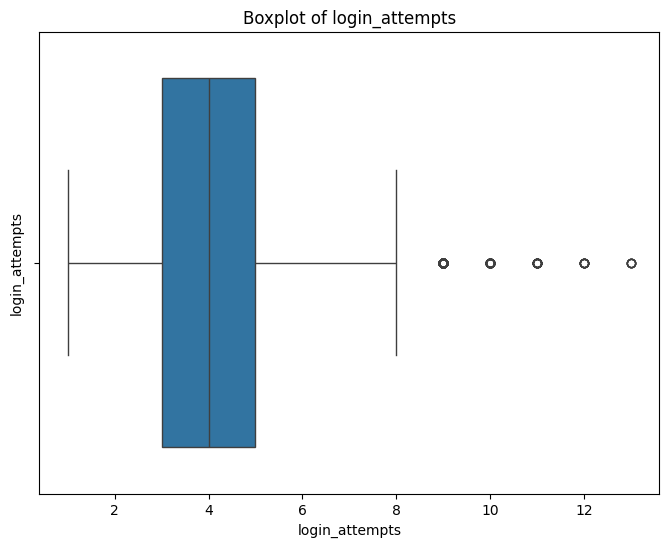

In [27]:
#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['login_attempts'])
plt.title('Boxplot of login_attempts')
plt.ylabel('login_attempts')

#Cuartiles
Q1__login_attempts = df["login_attempts"].quantile(0.25)
Q3__login_attempts = df["login_attempts"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["login_attempts"])
lim_inf__login_attempts = Q1__login_attempts - 1.5*rango_IQR
lim_sup__login_attempts =Q3__login_attempts + 1.5*rango_IQR
cant_lim_inf__login_attempts =  df[df['login_attempts'] > lim_sup__login_attempts].shape[0]
cant_lim_sup__login_attempts = df[df['login_attempts'] < lim_inf__login_attempts].shape[0]

print(f"Informacion: login_attempts \n Q1: {Q1__login_attempts}, Q3: {Q3__login_attempts}, limite inferior: {lim_inf__login_attempts}, limite superior: {lim_sup__login_attempts} \n High Outliers: {cant_lim_inf__login_attempts}, Low Outliers:{cant_lim_sup__login_attempts}")
#Cuales son los outliers?
    #df[df['login_attempts'] > lim_sup]
    #df[df['login_attempts'] < lim_inf]

#### Interpretacion
1. No hay actividad anormal en intentos de login.
2. No hay evidencia de ataques tipo "brute force".

### 3. sesion_duration

Informacion: session_duration 
 Q1: 231.95300642419463, Q3: 1105.3806022240433, limite inferior: -1078.1883872755782, limite superior: 2415.521995923816 
 High Outliers: 418, Low Outliers:0


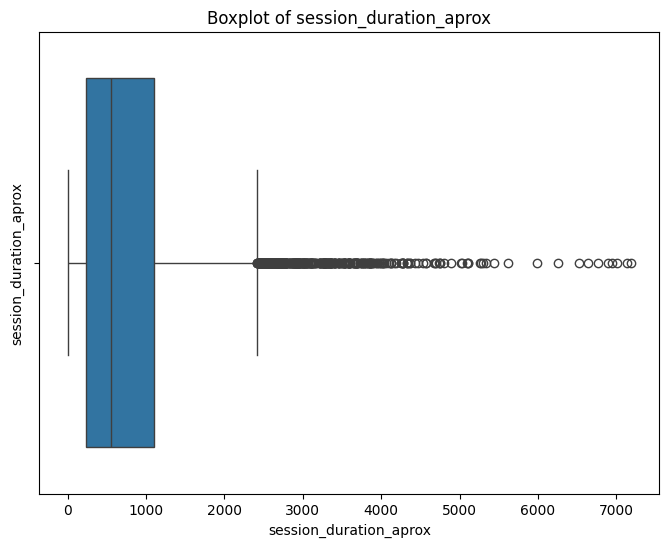

In [28]:
#Creacion de columna aproximada de session_duration
df["session_duration_aprox"] = df["session_duration"].round()
#print(df["session_duration_aprox"].head(10))

#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['session_duration_aprox'])
plt.title('Boxplot of session_duration_aprox')
plt.ylabel('session_duration_aprox')

#Cuartiles
Q1__sesion_duration = df["session_duration"].quantile(0.25)
Q3__sesion_duration = df["session_duration"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["session_duration"])
lim_inf__sesion_duration = Q1__sesion_duration - 1.5*rango_IQR
lim_sup__sesion_duration =Q3__sesion_duration + 1.5*rango_IQR
cant_lim_inf__sesion_duration =  df[df['session_duration'] > lim_sup__sesion_duration].shape[0]
cant_lim_sup__sesion_duration = df[df['session_duration'] < lim_inf__sesion_duration].shape[0]

print(f"Informacion: session_duration \n Q1: {Q1__sesion_duration }, Q3: {Q3__sesion_duration}, limite inferior: {lim_inf__sesion_duration}, limite superior: {lim_sup__sesion_duration} \n High Outliers: {cant_lim_inf__sesion_duration}, Low Outliers:{cant_lim_sup__sesion_duration}")
#Cuales son los outliers?
    #df[df['session_duration'] > lim_sup]
    #df[df['session_duration'] < lim_inf]

#### Interpretación

Sesiones anormalmente largas pueden:
1. Indicar secuestro de sesión (session hijacking)
2. Procesos automatizados
3. Bots conectados permanentemente
4. Actividad continua de extracción o inyección de datos


### 4. ip_reputation_score

Informacion: ip_reputation_score 
 Q1: 0.191946488079701, Q3: 0.4533878446573279, limite inferior: -0.20021554678673936, limite superior: 0.8455498795237683 
 High Outliers: 21, Low Outliers:0


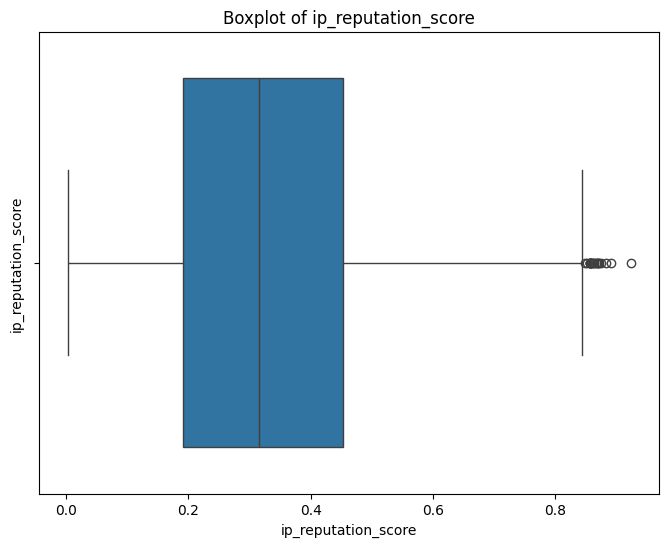

In [29]:
#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ip_reputation_score'])
plt.title('Boxplot of ip_reputation_score')
plt.ylabel('ip_reputation_score')

#Cuartiles
Q1__ip_reputation_score = df["ip_reputation_score"].quantile(0.25)
Q3__ip_reputation_score = df["ip_reputation_score"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["ip_reputation_score"])
lim_inf__ip_reputation_score = Q1__ip_reputation_score - 1.5*rango_IQR
lim_sup__ip_reputation_score =Q3__ip_reputation_score + 1.5*rango_IQR
cant_lim_inf__ip_reputation_score =  df[df['ip_reputation_score'] > lim_sup__ip_reputation_score].shape[0]
cant_lim_sup__ip_reputation_score = df[df['ip_reputation_score'] < lim_inf__ip_reputation_score].shape[0]

print(f"Informacion: ip_reputation_score \n Q1: {Q1__ip_reputation_score }, Q3: {Q3__ip_reputation_score}, limite inferior: {lim_inf__ip_reputation_score}, limite superior: {lim_sup__ip_reputation_score} \n High Outliers: {cant_lim_inf__ip_reputation_score}, Low Outliers:{cant_lim_sup__ip_reputation_score}")
#Cuales son los outliers?
    #df[df['ip_reputation_score'] > lim_sup]
    #df[df['ip_reputation_score'] < lim_inf]

#### Interpretación
Outliers altos pueden indicar:
1. IPs muy sospechosas
2. Bots conocidos
3. Redes comprometidas

### 5. failed_logins

Informacion: failed_logins 
 Q1: 1.0, Q3: 2.0, limite inferior: -0.5, limite superior: 3.5 
 High Outliers: 323, Low Outliers:0


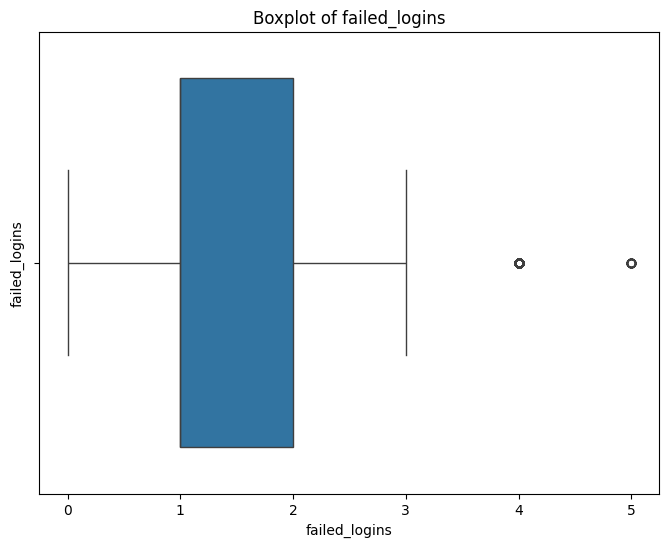

In [30]:
#grafico - Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['failed_logins'])
plt.title('Boxplot of failed_logins')
plt.ylabel('failed_logins')

#Cuartiles
Q1__failed_logins = df["failed_logins"].quantile(0.25)
Q3__failed_logins = df["failed_logins"].quantile(0.75)

#IQR y limites
rango_IQR =iqr(df["failed_logins"])
lim_inf__failed_logins = Q1__failed_logins - 1.5*rango_IQR
lim_sup__failed_logins =Q3__failed_logins + 1.5*rango_IQR
cant_lim_inf__failed_logins =  df[df['failed_logins'] > lim_sup__failed_logins].shape[0]
cant_lim_sup__failed_logins = df[df['failed_logins'] < lim_inf__failed_logins].shape[0]

print(f"Informacion: failed_logins \n Q1: {Q1__failed_logins }, Q3: {Q3__failed_logins}, limite inferior: {lim_inf__failed_logins}, limite superior: {lim_sup__failed_logins} \n High Outliers: {cant_lim_inf__failed_logins}, Low Outliers:{cant_lim_sup__failed_logins}")
#Cuales son los outliers?
    #df[df['failed_logins'] > lim_sup]
    #df[df['failed_logins'] < lim_inf]

#### Interpretación
Evidencia un número significativo de sesiones con intentos de acceso inusualmente altos. 

1. Ataques de fuerza bruta.

2. Credenciales equivocadas repetidas.

3. Actividad automatizada sospechosa.

### **Creación de Variables**
Convertir el tiempo de duración de sesión de segundos a minutos

In [31]:
minutos = lambda x:x/60
df["minutos_sesion"] = minutos(df["session_duration"])
#df.head()

Convertir la variable de intentos de inicio de sesión fallidos así:
- De 1 a 3 intentos, usual.
- Más de 3 intentos, inusual.

In [32]:
def intentos(x):
  if x <= 3:
    return "Usual"
  else:
    return "Inusual"

df["accesos_fallidos"] = df["login_attempts"].map(intentos)
#df.head()

Clasificación por tamaño de network packet size

In [33]:
tamaño = lambda x : "Grande" if x >= 1000 else "Mediano" if x > 300 and x < 1000 else "Pequeño"
df["paquetes_bytes"] = df["network_packet_size"].map(tamaño)
#df.head()

**Interpretación**

Notamos que el tiempo máximo es de 119 minutos, lo que nos lleva a presumir que en la base de datos se realizó recolectando datos de páginas o apps como por ejemplo, aplicaciones bancarias.

### **Filtración y Segmentación del Dataset**

Una vez depurado el dataset, se aplican múltiples filtros para clasificar los registros y analizar comportamientos sospechosos, tráfico normal y ataques confirmados.

---

### **6. Filtración de Datos**

#### **6.1 Usuarios con Comportamiento Altamente Sospechoso**
Se identifican sesiones donde coinciden dos factores críticos al mismo tiempo, como:
- Reputación de IP muy baja.
- Alto número de intentos fallidos de acceso.

#### **6.2 Sesiones Muy Sospechosas (Multicriterio)**
Se construye un subconjunto con todas las sesiones que cumplen **al menos una condición grave**, tales como:
- Duración anormalmente larga.  
- Tamaño de paquetes excesivo.  
- Repetidos fallos de autenticación.  
- Mala reputación de IP.

#### **6.3 Sesiones Marcadas Como Ataque**
Se extraen todos los registros donde el dataset indica explícitamente `attack_detected = 1`.  
Esto permite contrastar patrones reales de ataque frente a los outliers detectados.

#### **6.4 Sesiones Limpias**
Se separan todas las sesiones completamente normales (`attack_detected = 0`) con el fin de compararlas frente al tráfico malicioso.

---

### **7. Segmentación por Características Específicas**

Una vez identificados ataques, outliers y sesiones sospechosas, se organiza el dataset en distintos subconjuntos basados en atributos particulares.

#### **7.1 Categoría del Navegador**
- `df_Firefox`  
- `df_Chrome`  
- `df_Edge`  
- `df_Safari`  

Permite analizar si ciertos navegadores están asociados a mayor actividad maliciosa o inusual.

#### **7.2 Tipo de Protocolo Utilizado**
- `df_TCP`  
- `df_UPD`  
- `df_ICMP`  

Ayuda a estudiar patrones según el tipo de protocolo de red.

#### **7.3 Método de Encriptación**
- `df_DES`  
- `df_AES`  

Permite identificar si determinados esquemas de cifrado están relacionados con sesiones seguras o sospechosas.


### Parte 1 - Decidir si eliminar o conservar outliers
- Para esto, necesitamos saber si fueron ataques o si simplemente son outliers, en ciberseguridad los outliers por lo general son ataques o relacionado.

In [34]:
#Guardado de outliers
outliers_network_packet_size = df[df["network_packet_size"] > lim_sup__network_packet_size]
outliers_login_attempts = df[df["login_attempts"] > lim_sup__login_attempts]
outliers_session_duration = df[df["session_duration"] > lim_sup__sesion_duration]
outliers_ip_reputation_score =  df[df["ip_reputation_score"] > lim_sup__ip_reputation_score]
outliers_failed_logins = df[df["failed_logins"] > lim_sup__failed_logins]


print(f"Network: {outliers_network_packet_size['attack_detected'].value_counts()}")
print(f"Login: {outliers_login_attempts['attack_detected'].value_counts()}")
print(f"Session: {outliers_session_duration['attack_detected'].value_counts()}")
print(f"Ip_rep: {outliers_ip_reputation_score['attack_detected'].value_counts()}")
print(f"Failed: {outliers_failed_logins['attack_detected'].value_counts()}")

#212 Registros que se cataogan como outliers y que no son ataques

#Eliminación de Outliers
df_clean = df[((df['attack_detected'] == 0) &((df["network_packet_size"] > lim_sup__network_packet_size) 
|(df["session_duration"] > lim_sup__sesion_duration))
)]

df_original = df.copy()
df_limpio = df.drop(df_clean.index).copy()

#Verificación que df_limpio eliminio los outliers que no sirven para el analisis (Falsos Positivos)
print(f"Verificación de outliers del df_limpio para network_packet_size: {df_limpio[df_limpio["network_packet_size"] > lim_sup__network_packet_size].shape[0]}")
print(f"Verificación de outliers del df_limpio para session_duration: {df_limpio[df_limpio["session_duration"] > lim_sup__sesion_duration].shape[0]}")


Network: attack_detected
0    21
1    16
Name: count, dtype: int64
Login: attack_detected
1    206
Name: count, dtype: int64
Session: attack_detected
1    227
0    191
Name: count, dtype: int64
Ip_rep: attack_detected
1    21
Name: count, dtype: int64
Failed: attack_detected
1    323
Name: count, dtype: int64
Verificación de outliers del df_limpio para network_packet_size: 16
Verificación de outliers del df_limpio para session_duration: 227


1. Se guardan los outliers de cada variable crítica para revisar cuántos corresponden a ataques y cuántos no.

2. Se identifican falsos positivos, es decir, outliers que no son ataques, especialmente en network_packet_size y session_duration.

3. Se eliminan esos falsos positivos del dataset para obtener un conjunto limpio (df_limpio).

4. Se verifica la limpieza, comprobando que los outliers no relacionados con ataques ya no estén presentes.

### Parte 2 - Filtros de variables para analisis

In [35]:
#Usuarios por comportamiento sospechoso
high_risk = df[
    (df["failed_logins"] > lim_sup__failed_logins) &
    (df["ip_reputation_score"] > lim_sup__ip_reputation_score)
]


#Sesiones MUY sospechosas (Outliers)
suspicious_df = df[
    (df["session_duration"] > lim_sup__sesion_duration) |
    (df["network_packet_size"] > lim_sup__network_packet_size) |
    (df["failed_logins"] > lim_sup__failed_logins) |
    (df["ip_reputation_score"] > lim_sup__ip_reputation_score)
]

#Sesiones de ataque
attacks_only = df[df["attack_detected"] == 1]

#Sesiones limpias
Clean_sessions = df[df["attack_detected"] == 0]

#Caracteristicas especificas
#Navegador
df_Firefox = df[df["browser_type"] == "Firefox"]
df_Chrome = df[df["browser_type"] == "Chrome"]
df_Edge = df[df["browser_type"] == "Edge"]
df_Safari = df[df["browser_type"] == "Safari"]
#Protocolo
df_TCP = df[df["protocol_type"] == "TCP"]
df_UPD = df[df["protocol_type"] == "UPD"]
df_ICMP = df[df["protocol_type"] == "ICMP"]
#Encriptación
df_DES = df[df["encryption_used"] == "DES"]
df_AES = df[df["encryption_used"] == "AES"]



- **high_risk**
Se filtraron los usuarios que tienen muchos intentos fallidos de inicio de sesión y además un puntaje de reputación IP alto, indicando alto riesgo de comportamiento malicioso.

- **suspicious_df**
Se identificaron sesiones muy sospechosas (outliers):
cualquier registro que supere los límites superiores de duración, tamaño de paquetes, intentos fallidos o reputación de IP.

- **attacks_only**
Se aislaron únicamente las sesiones donde el sistema detectó un ataque real (attack_detected = 1).

- **Clean_sessions**
Se filtraron las sesiones limpias, es decir, sin ataque (attack_detected = 0).

- **df_Firefox**, **df_Chrome**, **df_Edge**, **df_Safari**
Se separaron los usuarios según el tipo de navegador utilizado.

- **df_TCP**, **df_UDP**, **df_ICMP**
Se separaron las sesiones según el protocolo de red utilizado.

- df_DES, df_AES
Se filtraron las sesiones según el algoritmo de encriptación usado.

### **Agrupación**
    

##### **Browser type - Failed Logins**
Es de nuestro interés conocer la cantidad de intentos fallidos de inicio de sesión por buscador, esto podría ayudarnos a reconocer buscadores con más errores o inconsistencias.

In [36]:
df_limpio.groupby("browser_type")["failed_logins"].sum()

browser_type
Chrome     7648
Edge       2200
Firefox    2886
Safari      734
Unknown     746
Name: failed_logins, dtype: int64

Con la agrupación anterior se pueden dar falsas acusaciones hacía el buscador Chrome ya que su cantidad de intentos fallidos al iniciar sesión es notablemente superior al compararla con otros buscadores, sin embargo, revisando la siguiente agrupación se puede evidenciar que lo anteriormente descrito puede deberse a que también es superior en cuanto a los tiempos de sesión y por lo tanto, de usuarios.

In [37]:
df_limpio.groupby("browser_type")["session_duration"].sum()

browser_type
Chrome     3.714599e+06
Edge       1.048408e+06
Firefox    1.420191e+06
Safari     3.825410e+05
Unknown    3.832592e+05
Name: session_duration, dtype: float64

##### **Failed Logins - Unusual Time Access**
Frecuentemente los ataques cibernéticos prenden alertas con los intentos fallidos de inicio de sesión, pero no es solo eso lo que debe interesarnos, es importante analizar otras variables de comportamiento del uisuario como la duración de la sesión y si esta es inusual o no.
Se presume que entre más complicado sea iniciar sesión ( mayor cantidad de intentos fallidos), más intención habrá en dejar la sesión abierta (mayor duración en tiempo).

In [38]:
df_limpio.groupby("failed_logins")["minutos_sesion"].sum()

failed_logins
0    18623.290709
1    40162.780806
2    35163.446991
3    17313.476053
4     3965.683250
5      587.951801
Name: minutos_sesion, dtype: float64

La agrupación de duración de sesión por intentos fallidos deja en evidencia que lo presunto anteriormente es ligeramente falso ya que a mayor cantidad de intentos fallidos hay menos tiempo en sesión.

In [39]:
df_limpio.groupby("failed_logins")["unusual_time_access"].sum()

failed_logins
0    231
1    511
2    438
3    186
4     52
5      7
Name: unusual_time_access, dtype: int64

Sin embargo, lo analizado hasta ahora se debe complementar con lo catalogado como inusual o no en el comportamiento del usuario. 
En este caso vemos que las actividades que prenden alertas son más en los intentos de sesión fallidos dentro del rango de 0 a 2, es decir, el foco debe reasignarse a las sesines grandes en cuanto a tiempo en lugar de los intentos fallidos, velando siempre por tener información complementada que permita sacar mejores conclusiones.

##### **Protocol Type & Paquetes Bytes - Ataque Detectado"**

In [40]:
df_limpio.groupby(["protocol_type","paquetes_bytes"])["attack_detected"].sum()

protocol_type  paquetes_bytes
ICMP           Grande               0
               Mediano            175
               Pequeño             34
TCP            Grande              18
               Mediano           2423
               Pequeño            522
UDP            Grande               9
               Mediano            925
               Pequeño            158
Name: attack_detected, dtype: int64

Se puede observar que los más atacados son aquellos que usan paquetes medianos y protocolo TCP, de nuevo, se pueden generar conclusiones falsas antes de obtener la siguiente información por variable.

In [41]:
df_limpio["paquetes_bytes"].value_counts()

paquetes_bytes
Mediano    7789
Pequeño    1491
Grande       46
Name: count, dtype: int64

In [42]:
df_limpio["protocol_type"].value_counts()

protocol_type
TCP     6474
UDP     2357
ICMP     495
Name: count, dtype: int64

Ya con lo visto podemos notar que al igual que en el caso del buscador, hay más iconsistencias que pueden tener como causa el hecho de contar con más usuarios.

# **Visualizaciones**:

La exploración visual de datos constituye una etapa fundamental en el análisis de seguridad cibernética, ya que permite identificar patrones, anomalías y relaciones entre variables que podrían ser indicadores de actividad maliciosa. En esta sección se presenta un conjunto de visualizaciones diseñadas estratégicamente para examinar las características del tráfico de red y su relación con la detección de ataques en el dataset.

El análisis comienza con una **nota importante sobre el desbalance de clases**: el dataset contiene 1009 registros más de sesiones normales (5273) que de ataques (4264), lo cual representa un ligero desbalance que debe considerarse en la interpretación de todos los gráficos subsecuentes y en el futuro modelado.

Las visualizaciones están organizadas para responder preguntas clave sobre el comportamiento del dataset:

- **Network packet size**: ¿Existen diferencias en el tamaño de paquetes entre tráfico normal y malicioso? Se utiliza un boxplot complementado con un gráfico de densidad para evaluar tanto las medidas de tendencia central como la forma completa de las distribuciones.

- **Protocol type**: ¿Qué protocolos (TCP, UDP, ICMP) concentran más ataques? Mediante gráficos de torta y barras se analiza tanto el volumen total de sesiones como la proporción de ataques por protocolo.

- **Browser type**: ¿Ciertos navegadores están más asociados con actividad sospechosa? Un gráfico de barras horizontales revela patrones de comportamiento por navegador.

- **IP reputation score**: ¿Las IPs con menor reputación están vinculadas a ataques? Un diagrama de violín muestra las distribuciones completas y permite identificar diferencias en forma y dispersión.

- **Login attempts**: ¿Los intentos de login múltiples son indicadores de fuerza bruta? Un boxplot examina si existe concentración de intentos en sesiones con ataques detectados.

Cada visualización incluye análisis estadísticos complementarios y conclusiones específicas que orientarán la selección de variables discriminatorias para el modelo de detección de intrusiones. El objetivo es determinar qué características del tráfico de red presentan patrones distintivos que puedan servir como predictores efectivos de actividad maliciosa.

## Nota:

In [78]:
df["attack_detected"].value_counts()

attack_detected
0    5273
1    4264
Name: count, dtype: int64

In [79]:
5273 - 4264

1009

Notamos que hay **1009** registros más en la categoría **“No ataque” (5273)** en comparación con la categoría **“Ataque” (4264)**.

Esto indica un ligero desbalance en los datos, con más sesiones normales que ataques. Aunque la diferencia no es grande, puede afectar la interpretación del análisis y debe ser considerado para cualquier grafico asociado a esta variable.


## 1. Box-Plot entre las variables **"network_packet_size"** y **"attack_detected"**

El siguiente boxplot muestra cómo varía el tamaño de los paquetes de red **(network_packet_size)** entre sesiones donde no se detectó un ataque y sesiones donde sí ocurrió uno. Esta comparación permite visualizar diferencias en la mediana, la dispersión y la presencia de valores atípicos, lo que ayuda a identificar si los ataques presentan patrones distintivos en el tamaño de los paquetes que puedan considerarse indicadores de actividad peligrosa.

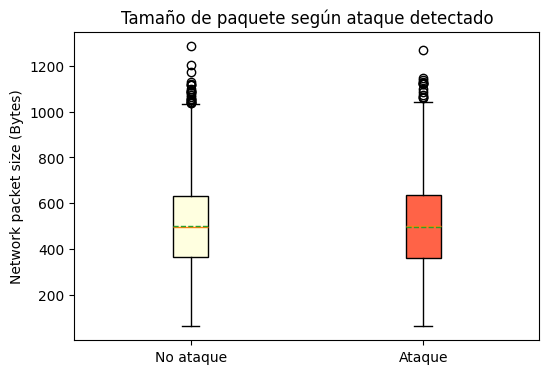

In [80]:
#Separacion por grupo
grupo_no = df.loc[df["attack_detected"]==0, "network_packet_size"]
grupo_si = df.loc[df["attack_detected"]==1, "network_packet_size"]

#Creacion general del grafico
plt.figure(figsize=(6,4))
bp=plt.boxplot([grupo_no, grupo_si],tick_labels=["No ataque", "Ataque"],showmeans=True,meanline=True,patch_artist=True)
plt.setp(bp["boxes"][0], facecolor="lightyellow")
plt.setp(bp["boxes"][1], facecolor="tomato")
plt.title("Tamaño de paquete según ataque detectado")
plt.ylabel("Network packet size (Bytes)")
plt.show()

**Cantidad de atipicos en cada categoria:**

In [81]:
atipicos_no_ataque = df[(df["attack_detected"] == 0) & (df["network_packet_size"] > 1000)]
atipicos_ataque = df[(df["attack_detected"] == 1) & (df["network_packet_size"] > 1000)]
print("Total de atipicos en (Ataque):", len(atipicos_ataque))
print("Total de atipicos en (No ataque):", len(atipicos_no_ataque))


Total de atipicos en (Ataque): 27
Total de atipicos en (No ataque): 39


El boxplot muestra que el tamaño de los paquetes de red presenta una distribución **similar** tanto en sesiones con ataque como en sesiones normales.

Sin embargo, ambos grupos exhiben valores atípicos por encima de los 1000 bytes, lo que evidencia que los tamaños extremos no son exclusivos de actividad maliciosa.

Aunque las sesiones con ataque muestran una ligera mayor dispersión, los datos **NO** indican una diferencia suficientemente marcada como para considerar el tamaño del paquete como un indicador confiable por sí solo. Esto sugiere que, para detectar intrusiones de manera efectiva, es necesario complementar este análisis con otras variables del dataset.

## 2.Grafico de torta y de barras entre las variables **"protocol_type"** y **"attack_detected"**

El siguiente gráfico combinado compuesto por un gráfico de torta y uno de barras muestra la distribución de ataques detectados **(attack_detected)** por tipo de protocolo de red **(protocol_type)**, junto con el volumen total de sesiones y la proporción de ataques en cada uno.

Esta representación permite identificar qué protocolos muestran más casos relacionados con ataques y cuáles se mantienen con un comportamiento más seguro o estable. Al comparar estas proporciones, es posible detectar **patrones** que indican cuales son más vulnerables o utilizados con mayor frecuencia en intentos de intrusión.

In [82]:
df["protocol_type"].value_counts()

protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64

La cantidad de registros para cada protocolo es significativamente **desigual**, hay que tenerlo en cuenta para el analisis.

**Grafico de Torta**

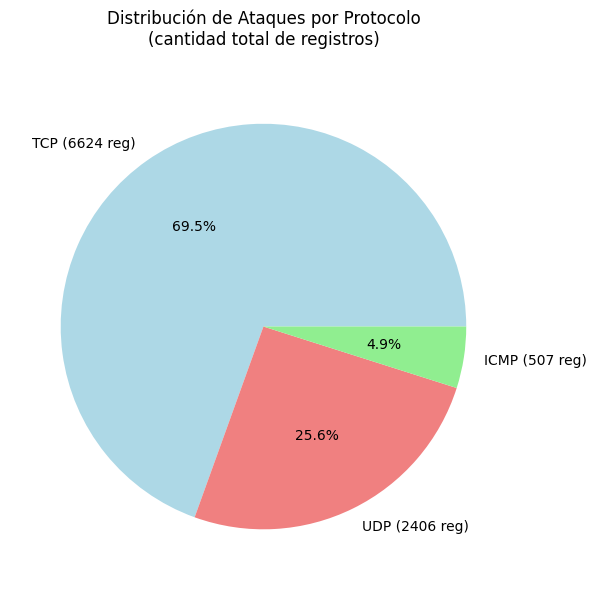

In [83]:
# Cálculo de ataques y totales por protocolo
ataques = df[df['attack_detected'] == 1]['protocol_type'].value_counts()
total = df['protocol_type'].value_counts()

# Crear etiquetas para la torta
labels_pie = [f"{proto} ({total[proto]} reg)" for proto in ataques.index]

# Gráfico de torta
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(ataques,labels=labels_pie,autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'lightgreen'],textprops={'fontsize': 10})
plt.title("Distribución de Ataques por Protocolo\n(cantidad total de registros)",fontsize=12, pad=20)
plt.tight_layout()
plt.show()

**Grafico de Barras**

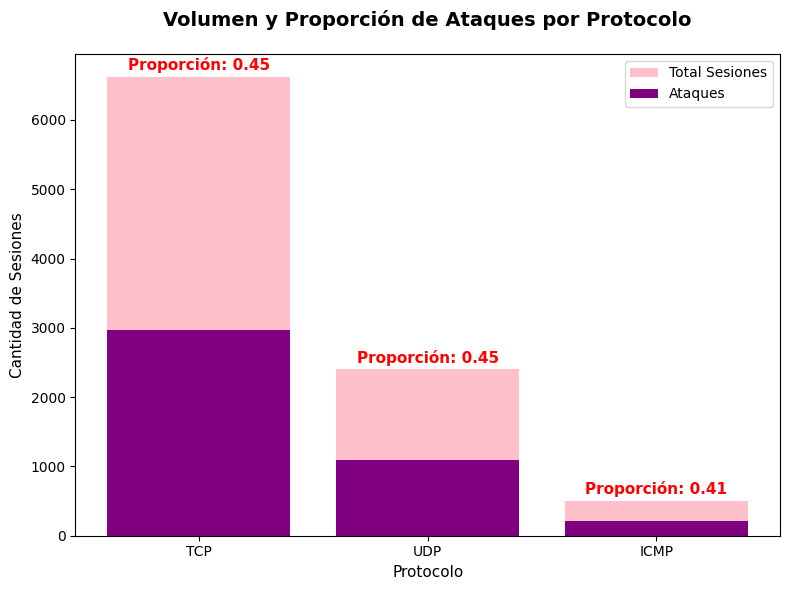

In [95]:
# Cálculo de ataques y totales por protocolo
attacks = df[df['attack_detected'] == 1]['protocol_type'].value_counts()
total = df['protocol_type'].value_counts()

# Crear DataFrame para barras
data = pd.DataFrame({
    'Total Sesiones': total,
    'Ataques': attacks,
    'Proporción': (attacks / total).round(2)
}).fillna(0)

# Ordenar por Total Sesiones descendente
data = data.sort_values('Total Sesiones', ascending=False)

# Gráfico de barras verticales (SOLO LAS BARRAS)
plt.figure(figsize=(8, 6))
bars_total = plt.bar(data.index, data['Total Sesiones'], color='pink', label='Total Sesiones')
bars_ataques = plt.bar(data.index, data['Ataques'], color='purple', label='Ataques')

# Etiquetas ENCIMA de cada barra total: "Proporción: 0.45"
for i, (idx, row) in enumerate(data.iterrows()):
    plt.text(i, row['Total Sesiones'] + 50, f"Proporción: {row['Proporción']:.2f}",
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='red')

plt.title("Volumen y Proporción de Ataques por Protocolo", fontsize=14, fontweight='bold', pad=20)
plt.ylabel("Cantidad de Sesiones", fontsize=11)
plt.xlabel("Protocolo", fontsize=11)
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Este grafico fue realizado con ayuda de IA**

El gráfico combinado de torta y barras verticales muestra que **TCP concentra el 69.5%** de los ataques detectados, seguido por **UDP (25.6%)** e **ICMP (4.9%)**. Aunque los tres protocolos presentan proporciones de ataque similares **(TCP y UDP en 0.45, ICMP en 0.41)**, las barras revelan que TCP es el más crítico en términos absolutos, al registrar **6624** sesiones totales y **2963** ataques.


Por su parte, UDP acumula **2406** sesiones y **1092** ataques, mientras que ICMP solo **507** sesiones y **209** ataques. Las proporciones marcadas en negrita sobre cada barra **(0.45, 0.45, 0.41)** confirman que la vulnerabilidad relativa es comparable entre protocolos, pero el impacto real **se concentra abrumadoramente en TCP** debido a su alto volumen de tráfico.


En conjunto, estos resultados confirman que los ataques no son exclusivos de un protocolo, pero **TCP representa el principal vector de riesgo** por su dominancia en sesiones y ataques absolutos. Por tanto, las estrategias de detección deben priorizar el monitoreo intensivo en TCP, sin descuidar UDP e ICMP en escenarios donde su tráfico sea crítico.

## 3. Gráfico de Barras Horizontales entre **"browser_type"** y **"attack_detected"**

El siguiente gráfico de barras horizontales muestra la cantidad de ataques detectados **(attack_detected)** para cada tipo de navegador **(browser_type)**.

Esta visualización permite identificar qué navegadores están asociados con más registros de actividad maliciosa y cuáles presentan un comportamiento más estable o seguro. Al comparar estas cantidades entre navegadores, es posible detectar patrones relacionados con vulnerabilidades, preferencias de los atacantes o diferencias en la exposición según el navegador utilizado.

In [85]:
df["browser_type"].value_counts()

browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64

La cantidad de registros para cada navegador es significativamente desigual, hay que tenerlo en cuenta para el analisis.

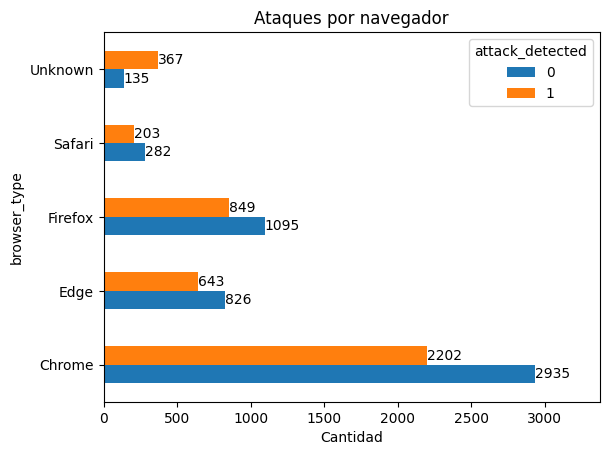

In [86]:
#Agrupacion y creacion del grafico
counts = df.groupby("browser_type")["attack_detected"].value_counts().unstack() # unstack convierte los valores del segundo índice (attack_detected) en columnas. Y cada navegador queda como fila y 0/1 quedan como columnas.


#Creacion general del grafico
grafico = counts.plot(kind="barh") #Un grafico de conteos en forma de barras horizontales
plt.title("Ataques por navegador")
plt.xlabel("Cantidad")
plt.ylabel("browser_type")
maximo = counts.values.max()
plt.xlim(0, maximo * 1.15)   # 15% de espacio para mejor presentacion

# Añadir números fuera de cada barra
for barras in grafico.containers: #Los .containers son cada barra (azul y naranja)
    grafico.bar_label(barras, label_type='edge') #bar_label genera los numeros y el tipo "edge" los pone al costado derecho

plt.show()

Chrome concentra la mayor actividad total, por lo que también acumula más ataques en números absolutos. Firefox y Edge muestran porcentajes de ataque parecidos a los de Chrome, pero con menos volumen, así que su impacto general es menor. Safari mantiene niveles moderados tanto en cantidad como en proporción.

El caso más llamativo es **Unknown**, que, aunque tiene pocas sesiones, presenta una proporción de ataques muy alta, lo que sugiere tráfico sospechoso o difícil de identificar.

## 4. Diagrama de Violin entre **"ip_reputation_score"** y **"attack_detected"**

El siguiente gráfico de violín muestra la distribución de la puntuación de reputación IP **(ip_reputation_score)** según si se detectó un ataque **(attack_detected)**.

Esta visualización permite identificar cómo varía la reputación de las IP en sesiones con y sin ataques detectados, revelando posibles diferencias en la densidad y la forma de las distribuciones. Al comparar estas distribuciones, es posible detectar patrones relacionados con el riesgo de intrusiones, como puntuaciones de reputación más bajas asociadas a actividades maliciosas, vulnerabilidades en redes o preferencias de los atacantes por IPs con menor credibilidad.

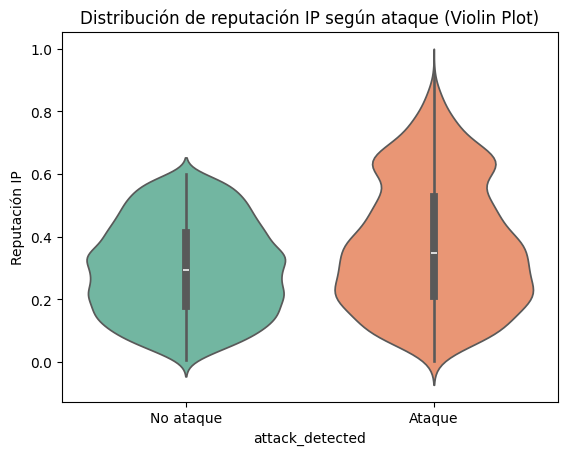

In [87]:
plt.figure()
import seaborn as sns

sns.violinplot(
    data=df,
    x="attack_detected",
    y="ip_reputation_score",
    hue="attack_detected",
    palette="Set2",
    legend=False
)

plt.xticks([0,1], ["No ataque", "Ataque"])
plt.ylabel("Reputación IP")
plt.title("Distribución de reputación IP según ataque (Violin Plot)")
plt.show()


Las sesiones sin ataques muestran una reputación IP media más baja **(alrededor de 0.30)**, con una distribución más compacta y valores que no superan el 0.60. En contraste, las sesiones con ataques presentan reputaciones más altas en promedio **(0.37)**, pero con mayor variabilidad, extendiéndose hasta casi 0.92.


El caso más llamativo es que los ataques **no se asocian necesariamente con IPs de baja reputación**, sino que ocurren incluso en aquellas con puntuaciones elevadas, lo que sugiere el uso de IPs "confiables" para evadir detección.

## 5. Box-Plot entre las variables **"login_attempts"** y **"attack_detected"**

El siguiente boxplot ilustra cómo se distribuye el tamaño de los paquetes de red **(network_packet_size)** en sesiones donde no se detectó un ataque frente a aquellas en las que sí se registró actividad maliciosa. Esta representación permite observar diferencias en la mediana, la dispersión y la presencia de valores atípicos entre ambos grupos, facilitando la identificación de patrones característicos de los ataques que podrían servir como indicadores de comportamientos anómalos en la red.

In [88]:
df["login_attempts"].value_counts()

login_attempts
3     1844
4     1843
5     1614
2     1363
6      964
1      868
7      567
8      268
9      124
10      47
11      22
12       8
13       5
Name: count, dtype: int64

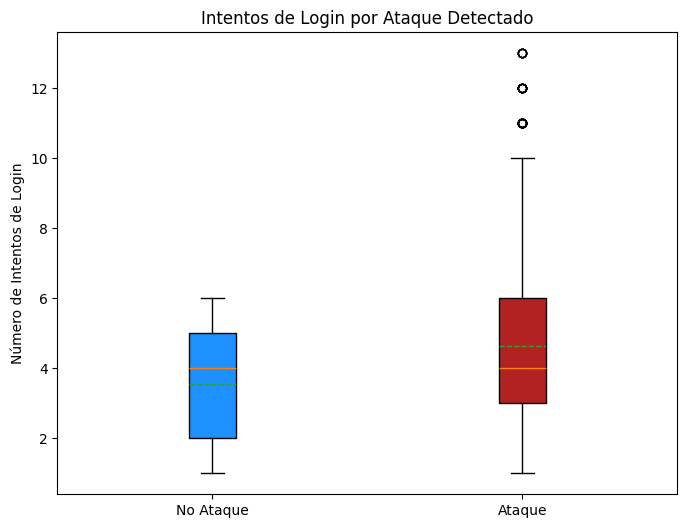

In [89]:
# Separación por grupo
grupo_no = df.loc[df["attack_detected"] == 0, "login_attempts"]
grupo_si = df.loc[df["attack_detected"] == 1, "login_attempts"]

# Creación del gráfico
plt.figure(figsize=(8,6))
bp=plt.boxplot([grupo_no, grupo_si],tick_labels=["No Ataque", "Ataque"],showmeans=True,meanline=True,patch_artist=True)
plt.setp(bp["boxes"][0], facecolor="dodgerblue")
plt.setp(bp["boxes"][1], facecolor="firebrick")

# Títulos
plt.title("Intentos de Login por Ataque Detectado")
plt.ylabel("Número de Intentos de Login")
plt.show()

Las sesiones sin ataques detectados presentan un número de intentos de login más concentrado alrededor de la mediana **(aproximadamente 4)**, con menor variabilidad y pocos valores extremos por encima de 7. En contraste, las sesiones con ataques muestran una distribución más dispersa, con una mediana similar pero cuartiles superiores más elevados y una mayor presencia de outliers que alcanzan hasta 13 intentos, lo que indica una tendencia a intentos repetidos posiblemente asociados a técnicas como fuerza bruta. Entonces los ataques se correlacionan con un mayor número de intentos en promedio, sugiriendo que esta variable podría ser un indicador útil para detección.